# Figures 12k fly

In [1]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Patch
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [17]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/12k_dechor_HyDrop_10x_otsu/cistopic_objs/cistopic_obj_12k_embryo_dechor_LCB_embryo_dechor_consensusupeaks_20082024_190topics.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    cistopic_obj = pickle.load(infile)

In [3]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/sci_ATAC/cistopic_objs/cistopic_obj_sciATAC_16_20hAEL_16072024_180topics.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    cistopic_obj_sciATAC = pickle.load(infile)

In [3]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 308228 × 95819


In [4]:
print(cistopic_obj_sciATAC)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 61480 × 67162


In [4]:
cistopic_obj.merge([cistopic_obj_sciATAC])

2025-08-27 11:27:01,328 cisTopic     INFO     You cannot merge objects with the same project id. Project id will be updated.
0
1
2025-08-27 11:30:06,672 cisTopic     INFO     cisTopic object 1 merged


In [9]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 369708 × 162909


In [5]:
cistopic_obj.cell_data['tech'] = cistopic_obj.cell_data['tech'].fillna('sciATAC')

In [8]:
cistopic_obj.cell_data

,barcode,Total_nr_frag_in_regions,Dupl_rate,cisTopic_nr_frag,Total_nr_frag,pycisTopic_leiden_10_0.6,sample_id,Log_total_nr_frag,FRIP,kde__log_Unique_nr_frag_in_regions__TSS_enrichment,...,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,Doublet_scores_fragments,Predicted_doublets_fragments,pycisTopic_leiden_10_1.2,embryo_annotations,embyro_annotations_paper
TACTGTTTGTTTCTTG___FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2,TACTGTTTGTTTCTTG,6611.0,0.322308,5442,11247.0,5,FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo...,4.051037,0.591708,0.072994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CATTGGCCTCGACTAT___FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2,CATTGGCCTCGACTAT,5518.0,0.341250,4556,8926.0,14,FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo...,3.950657,0.625510,0.079613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATTACCTACAACGTTC___FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2,ATTACCTACAACGTTC,11585.0,0.279603,10742,17836.0,5,FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo...,4.251297,0.656783,0.007916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTGTTGCACTACAGCT___FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2,CTGTTGCACTACAGCT,4298.0,0.281989,4991,8628.0,2,FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo...,3.935910,0.510412,0.041196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GAAGTTCTGTCATTTC___FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2,GAAGTTCTGTCATTTC,2202.0,0.235249,2281,3932.0,2,FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo...,3.594614,0.563352,0.035719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCATCAGAACGGACTGGCCTTCTAATCCGGTACGATTCT-exp2_hrs16-20_b1___exp2_hrs16-20_b1,ATCATCAGAACGGACTGGCCTTCTAATCCGGTACGATTCT,NaN,NaN,994,NaN,NaN,exp2_hrs16-20_b1,NaN,NaN,NaN,...,0.296676,5.228205,0.003216,0.615458,1.017663,0.075051,False,23,Amnioserosa,Amnioserosa
TCTCGAAGGCGCATTAGGCGACCAGTTCAGGCAGCAGCTA-exp2_hrs16-20_b1___exp2_hrs16-20_b1,TCTCGAAGGCGCATTAGGCGACCAGTTCAGGCAGCAGCTA,NaN,NaN,2142,NaN,NaN,exp2_hrs16-20_b1,NaN,NaN,NaN,...,0.381675,3.642508,0.068289,1.385559,0.806324,0.069873,False,3,Yolk,Yolk
GCGCAGGCGATGACGCGACCTGGCCGTCTTTCAATTCAAC-exp2_hrs16-20_b1___exp2_hrs16-20_b1,GCGCAGGCGATGACGCGACCTGGCCGTCTTTCAATTCAAC,NaN,NaN,1848,NaN,NaN,exp2_hrs16-20_b1,NaN,NaN,NaN,...,0.241294,2.901960,0.115370,1.522585,0.205045,0.048523,False,3,Yolk,Yolk
GTATAAGGCATAATTCCGGTCTTCAGTAGTGCAGCAGCTA-exp2_hrs16-20_b1___exp2_hrs16-20_b1,GTATAAGGCATAATTCCGGTCTTCAGTAGTGCAGCAGCTA,NaN,NaN,3174,NaN,NaN,exp2_hrs16-20_b1,NaN,NaN,NaN,...,0.373447,2.206060,0.032888,0.894798,1.032148,0.075051,False,3,Yolk,Yolk


# color dict

In [4]:
color_dict = {'tech':
              {'HyDrop_v2': '#E69F00', '10x_v2': '#0072B2'},

        'annotations_big_embryo_atlas_15082024_broad':
            {'Epidermis': '#E69F00', 
             'Midgut': '#009E73', 
             'VNC': '#CC79A7', 
             'Fatbody': '#F0E442', 
             'NBs': '#CC79A7', 
             'Somatic_muscle': '#84BC3D', 
             'Neuronal_brain': '#CC79A7', 
             'Neuronal_brain_visual_system_dev': '#CC79A7', 
             'Pharnyx': '#9772D3', 
             'Hindgut': '#009E73', 
             'muscle_attachement_Stripe_body_segementation': '#C1C098', 
             'Tracheal_system': '#0072B2', 
             'PNS_sens': '#CC79A7', 
             'Primordium_all': '#8B167D', 
             'Proventriculus': '#6A31EC', 
             'Glia': '#000000', 
             'Visceral_muscle': '#547953', 
             'Plasmatocytes': '#56B4E9', 
             'Head_Ectoderm': '#8B167D', 
             'Malpighian_tubule': '#E6A7E2',
             'Endocrine_cells': '#28787B', 
             'Salivary_gland': '#28787B', 
             'Imaginal_disc_development': '#CEA427', 
             'Yolk': '#D55E00', 
             'Midgut_primordial_cells': '#4C5BF2', 
             'Gut_neuropeptide_related_cells': '#009E73', 
             'Amnioserosa': '#8B167D', 
             'Genital_disc': '#70DEC5', 
             'germ_line_related_cells': '#8B167D'}}


In [5]:
colors_annotations_big_embryo_atlas_15082024_broad={'Epidermis': '#E69F00', 
             'Midgut': '#009E73', 
             'VNC': '#CC79A7', 
             'Fatbody': '#F0E442', 
             'NBs': '#CC79A7', 
             'Somatic_muscle': '#84BC3D', 
             'Neuronal_brain': '#CC79A7', 
             'Neuronal_brain_visual_system_dev': '#CC79A7', 
             'Pharnyx': '#9772D3', 
             'Hindgut': '#009E73', 
             'muscle_attachement_Stripe_body_segementation': '#C1C098', 
             'Tracheal_system': '#0072B2', 
             'PNS_sens': '#CC79A7', 
             'Primordium_all': '#8B167D', 
             'Proventriculus': '#6A31EC', 
             'Glia': '#000000', 
             'Visceral_muscle': '#547953', 
             'Plasmatocytes': '#56B4E9', 
             'Head_Ectoderm': '#8B167D', 
             'Malpighian_tubule': '#E6A7E2',
             'Endocrine_cells': '#28787B', 
             'Salivary_gland': '#28787B', 
             'Imaginal_disc_development': '#CEA427', 
             'Yolk': '#D55E00', 
             'Midgut_primordial_cells': '#4C5BF2', 
             'Gut_neuropeptide_related_cells': '#009E73', 
             'Amnioserosa': '#8B167D', 
             'Genital_disc': '#70DEC5', 
             'germ_line_related_cells': '#8B167D'}

In [6]:
colors_tech = {'HyDrop_v2': '#E69F00', '10x_v2': '#0072B2'}

In [ ]:
colors_tech_all = {'HyDrop_v2': '#E69F00', '10x_v2': '#0072B2', 'sciATAC':'#547953'}

In [13]:
cistopic_obj.cell_data.columns

Index(['barcode', 'Total_nr_frag_in_regions', 'Dupl_rate', 'cisTopic_nr_frag',
       'Total_nr_frag', 'pycisTopic_leiden_10_0.6', 'sample_id',
       'Log_total_nr_frag', 'FRIP',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'cisTopic_log_nr_acc', 'Log_unique_nr_frag', 'Unique_nr_frag',
       'TSS_enrichment', 'kde__log_Unique_nr_frag_in_regions__FRIP',
       'cisTopic_nr_acc', 'cisTopic_log_nr_frag',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'Dupl_nr_frag',
       'Unique_nr_frag_in_regions', 'annotations_big_embryo_atlas_20062024',
       'annotations_big_embryo_atlas_12082024',
       'annotations_big_embryo_atlas_13082024',
       'annotations_big_embryo_atlas_15082024', 'tech_details',
       'annotations_big_embryo_atlas_15082024_broad', 'tech', 'dechor'],
      dtype='object')

## adjust the columns from sciATAC& 10x/HyDrop

In [10]:
# Assuming cistopic_obj.cell_data is a pandas DataFrame
# Create a new column that combines 'TSS' and 'TSS_enrichment', leaving out NAs

cistopic_obj.cell_data['FRIP_combined'] = cistopic_obj.cell_data['FRIP'].combine_first(cistopic_obj.cell_data['fraction_of_fragments_in_peaks'])

# Now 'TSS_combined' will have the values from 'TSS', and wherever 'TSS' is NA, it will take the values from 'TSS_enrichment'


In [11]:
# Assuming cistopic_obj.cell_data is a pandas DataFrame
# Create a new column that combines 'TSS' and 'TSS_enrichment', leaving out NAs

cistopic_obj.cell_data['log10_unique_fragments_count_combined'] = cistopic_obj.cell_data['log10_unique_fragments_count'].combine_first(cistopic_obj.cell_data['Log_unique_nr_frag'])

# Now 'TSS_combined' will have the values from 'TSS', and wherever 'TSS' is NA, it will take the values from 'TSS_enrichment'


In [12]:
# Assuming cistopic_obj.cell_data is a pandas DataFrame
# Create a new column that combines 'TSS' and 'TSS_enrichment', leaving out NAs

cistopic_obj.cell_data['TSS_combined'] = cistopic_obj.cell_data['TSS_enrichment'].combine_first(cistopic_obj.cell_data['tss_enrichment'])

# Now 'TSS_combined' will have the values from 'TSS', and wherever 'TSS' is NA, it will take the values from 'TSS_enrichment'

# count

In [7]:
cistopic_obj.cell_data.columns

Index(['barcode', 'Total_nr_frag_in_regions', 'Dupl_rate', 'cisTopic_nr_frag',
       'Total_nr_frag', 'pycisTopic_leiden_10_0.6', 'sample_id',
       'Log_total_nr_frag', 'FRIP',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'cisTopic_log_nr_acc', 'Log_unique_nr_frag', 'Unique_nr_frag',
       'TSS_enrichment', 'kde__log_Unique_nr_frag_in_regions__FRIP',
       'cisTopic_nr_acc', 'cisTopic_log_nr_frag',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'Dupl_nr_frag',
       'Unique_nr_frag_in_regions', 'annotations_big_embryo_atlas_20062024',
       'annotations_big_embryo_atlas_12082024',
       'annotations_big_embryo_atlas_13082024',
       'annotations_big_embryo_atlas_15082024', 'tech_details',
       'annotations_big_embryo_atlas_15082024_broad', 'tech', 'dechor'],
      dtype='object')

In [8]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by technique and compute the mean of 'Unique_nr_frag'
mean_fragments = cell_data.groupby('tech')['Log_unique_nr_frag'].mean()

# Retrieve the mean values for HyDrop_v2 and 10x_v2
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean = mean_fragments.get('10x_v2')

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean Unique_nr_frag for HyDrop_v2: {hydrop_v2_mean:.2f}")
    print(f"Mean Unique_nr_frag for 10x_v2: {tenx_v2_mean:.2f}")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's Log_unique_nr_frag on average.")
else:
    print("One or both technique labels ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean Unique_nr_frag for HyDrop_v2: 3.58
Mean Unique_nr_frag for 10x_v2: 3.81
HyDrop_v2 reaches 94.10% of 10x_v2's Log_unique_nr_frag on average.


In [6]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by technique and compute the mean of 'Unique_nr_frag'
mean_fragments = cell_data.groupby('tech')['Log_unique_nr_frag'].mean()

# Retrieve the mean values for HyDrop_v2 and 10x_v2
hydrop_v2_mean = mean_fragments.get('sciATAC')
tenx_v2_mean = mean_fragments.get('10x_v2')

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean Unique_nr_frag for sciATAC: {hydrop_v2_mean:.2f}")
    print(f"Mean Unique_nr_frag for 10x_v2: {tenx_v2_mean:.2f}")
    print(f"sciATAC reaches {percent_of_10x:.2f}% of 10x_v2's Log_unique_nr_frag on average.")
else:
    print("One or both technique labels ('sciATAC' and '10x_v2') were not found in the data!")


Mean Unique_nr_frag for sciATAC: 3.33
Mean Unique_nr_frag for 10x_v2: 3.81
sciATAC reaches 87.43% of 10x_v2's Log_unique_nr_frag on average.


In [12]:
# assuming your dataframe has a column 'tech' with strings like "HyDrop_v2", "10x_v2", "sciATAC"
hydrop_v2_data = cell_data[cell_data['tech'].str.contains("HyDrop_v2", case=False, na=False)]
tenx_v2_data   = cell_data[cell_data['tech'].str.contains("10x_v2", case=False, na=False)]
sciATAC_data   = cell_data[cell_data['tech'].str.contains("sciATAC", case=False, na=False)]

# now compute means and stds of the numeric 'Log_unique_nr_frag'
mean_fragments = cell_data.groupby('tech')['Log_unique_nr_frag'].mean()
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean   = mean_fragments.get('10x_v2')
sciATAC_mean   = mean_fragments.get('sciATAC')

hydrop_v2_sd   = hydrop_v2_data['Log_unique_nr_frag'].std()
tenx_v2_sd     = tenx_v2_data['Log_unique_nr_frag'].std()
sciATAC_sd     = sciATAC_data['Log_unique_nr_frag'].std()

print(f"Mean Log_unique_nr_frag for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
print(f"Mean Log_unique_nr_frag for 10x_v2:   {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
print(f"Mean Log_unique_nr_frag for sciATAC:  {sciATAC_mean:.2f} (SD: {sciATAC_sd:.2f})")


Mean Log_unique_nr_frag for HyDrop_v2: 3.58 (SD: 0.36)
Mean Log_unique_nr_frag for 10x_v2:   3.81 (SD: 0.23)
Mean Log_unique_nr_frag for sciATAC:  3.33 (SD: 0.25)


In [13]:
# assuming your dataframe has a column 'tech' with strings like "HyDrop_v2", "10x_v2", "sciATAC"
hydrop_v2_data = cell_data[cell_data['tech'].str.contains("HyDrop_v2", case=False, na=False)]
tenx_v2_data   = cell_data[cell_data['tech'].str.contains("10x_v2", case=False, na=False)]
sciATAC_data   = cell_data[cell_data['tech'].str.contains("sciATAC", case=False, na=False)]

# now compute means and stds of the numeric 'Log_unique_nr_frag'
mean_fragments = cell_data.groupby('tech')['TSS_enrichment'].mean()
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean   = mean_fragments.get('10x_v2')
sciATAC_mean   = mean_fragments.get('sciATAC')

hydrop_v2_sd   = hydrop_v2_data['TSS_enrichment'].std()
tenx_v2_sd     = tenx_v2_data['TSS_enrichment'].std()
sciATAC_sd     = sciATAC_data['TSS_enrichment'].std()

print(f"Mean TSS_enrichment for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
print(f"Mean TSS_enrichment for 10x_v2:   {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
print(f"Mean TSS_enrichment for sciATAC:  {sciATAC_mean:.2f} (SD: {sciATAC_sd:.2f})")


Mean TSS_enrichment for HyDrop_v2: 4.46 (SD: 0.95)
Mean TSS_enrichment for 10x_v2:   4.18 (SD: 0.81)
Mean TSS_enrichment for sciATAC:  2.73 (SD: 0.51)


In [10]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
hydrop_v2_data = cell_data[cell_data['tech'].str.contains("HyDrop_v2", case=False, na=False)]
tenx_v2_data = cell_data[cell_data['tech'].str.contains("10x_v2", case=False, na=False)]
sciATAC_data = cell_data[cell_data['tech'].str.contains("sciATAC", case=False, na=False)]

# Group by technique and compute the mean of 'Unique_nr_frag'
mean_fragments = cell_data.groupby('tech')['FRIP'].mean()

# Retrieve the mean values for HyDrop_v2 and 10x_v2
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean = mean_fragments.get('10x_v2')
sciATAC_mean = mean_fragments.get('sciATAC')
hydrop_v2_sd = hydrop_v2_data['FRIP'].std()
tenx_v2_sd = tenx_v2_data['FRIP'].std()
sciATAC_sd = sciATAC_data['FRIP'].std()


if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Print the results
    print(f"Mean FRIP for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
    print(f"Mean FRIP for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"Mean FRIP for sciATAC: {sciATAC_mean:.2f} (SD: {sciATAC_sd:.2f})")

Mean FRIP for HyDrop_v2: 0.55 (SD: 0.14)
Mean FRIP for 10x_v2: 0.59 (SD: 0.09)
Mean FRIP for sciATAC: 0.60 (SD: 0.08)


# figures 10x & HyDrop v2 & sciATAC

/tmp/ipykernel_1029836/2957826786.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


2025-08-05 16:42:25,678 fontTools.subset INFO     maxp pruned
2025-08-05 16:42:25,685 fontTools.subset INFO     cmap pruned
2025-08-05 16:42:25,686 fontTools.subset INFO     kern dropped
2025-08-05 16:42:25,687 fontTools.subset INFO     post pruned
2025-08-05 16:42:25,687 fontTools.subset INFO     FFTM dropped
2025-08-05 16:42:25,689 fontTools.subset INFO     GPOS pruned
2025-08-05 16:42:25,691 fontTools.subset INFO     GSUB pruned
2025-08-05 16:42:25,699 fontTools.subset INFO     glyf pruned
2025-08-05 16:42:25,700 fontTools.subset INFO     Added gid0 to subset
2025-08-05 16:42:25,700 fontTools.subset INFO     Added first four glyphs to subset
2025-08-05 16:42:25,701 fontTools.subset INFO     Closing glyph list over 'MATH': 41 glyphs before
2025-08-05 16:42:25,701 fontTools.subset INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'H', 'P', 'T', 'V', 'a', 'b', 'c', 'e', 'f', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'q', 'r', '

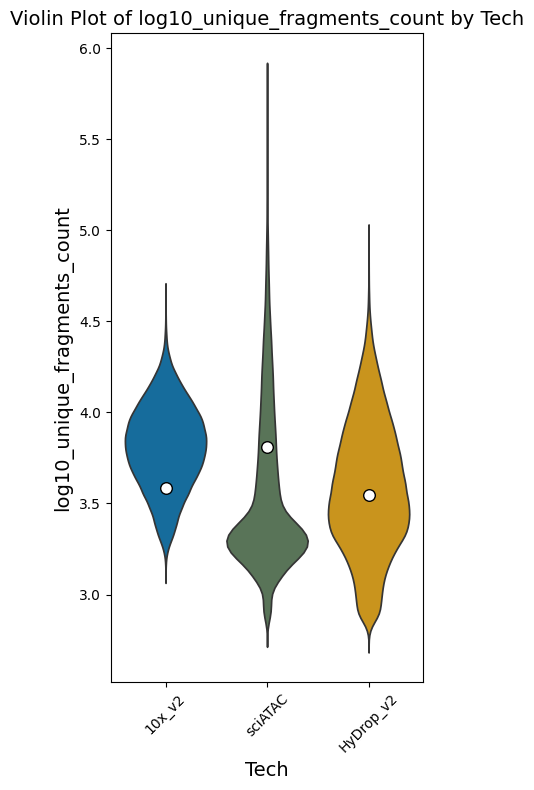

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define color palette
colors_tech_all = {
    'HyDrop_v2': '#E69F00',
    '10x_v2': '#0072B2',
    'sciATAC': '#547953'
}

# Plot violin without inner points
plt.figure(figsize=(4, 8))
ax = sns.violinplot(
    x='tech',
    y='log10_unique_fragments_count_combined',
    data=cistopic_obj.cell_data,
    inner=None,
    palette=colors_tech_all
)

# Add one white dot for the mean per tech
tech_means = cistopic_obj.cell_data.groupby('tech')['log10_unique_fragments_count_combined'].mean()
for i, tech in enumerate(colors_tech_all.keys()):
    if tech in tech_means:
        mean_val = tech_means[tech]
        ax.scatter(i, mean_val, color='white', edgecolor='black', s=70, zorder=3)

# Style
ax.tick_params(axis='x', labelrotation=45)
plt.title('Violin Plot of log10_unique_fragments_count by Tech', fontsize=14)
plt.xlabel('Tech', fontsize=14)
plt.ylabel('log10_unique_fragments_count', fontsize=14)

plt.tight_layout()
plt.savefig("Log_unique_nr_frag_tech_color_mean.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)
plt.show()
